# Homework 5

### worked with: Emma, Vitoria

## Problem 1: Rosenbrock Function

#### Problem 1a: Steepest Descent

In [1]:
# Problem 1a
import numpy as np
from scipy.optimize import line_search
from numpy.linalg import norm

def f(array):
    return 100*(array[1]-array[0]**2)**2 + (1-array[0])**2

def grad(array):
    partial_x = -400*array[0]*(-1*array[0]**2 +array[1]) + 2*array[0]-2
    partial_y = -200*array[0]**2 + 200*array[1]
    return np.array([partial_x,partial_y])

start_pt1 = np.array([-1,1])
start_pt2 = np.array([0,1])
start_pt3 = np.array([2,1])


# just store xk
def steepest_grad(f, grad, x_start):
    max_iters = 2000
    step_size_tol = 10**-8
    sk = 1 # initial to start
    iteration = 0
    x_list = []
    x_list.append(x_start) # want to add the initial points
    while norm(sk) > step_size_tol and iteration < max_iters:
        gradient = grad(x_start)
        direction = -1*gradient
        alpha,fc, gc,new_fval,old_fval,slope = line_search(f,grad,x_start,direction)
        #print(gradient)
        #print(line_search(f,grad,x_start,direction))
        x_next = x_start - alpha*gradient
        sk = -1*alpha*gradient #stepsize
        x_list.append(x_next)
        x_start = np.copy(x_next) # index to the next one
        iteration += 1
    return x_list, iteration

In [2]:
start1, iteration1 = steepest_grad(f,grad, start_pt1)
start2, iteration2 = steepest_grad(f,grad, start_pt2)
start3, iteration3 = steepest_grad(f,grad, start_pt3)

iter_list = [iteration1, iteration2, iteration3]
start_list = [start1, start2,start3]

In [3]:
points = [start_pt1, start_pt2, start_pt3]
for index, i in enumerate(iter_list):
    print(f"Here is the Amount of Iterations for point {points[index]} using Steepest Descent: {i}")

Here is the Amount of Iterations for point [-1  1] using Steepest Descent: 2
Here is the Amount of Iterations for point [0 1] using Steepest Descent: 1571
Here is the Amount of Iterations for point [2 1] using Steepest Descent: 2000


Referenced this: https://andreask.cs.illinois.edu/cs357-s15/public/demos/12-optimization/Steepest%20Descent.html
for plotting

Text(0.5, 0, 'z')

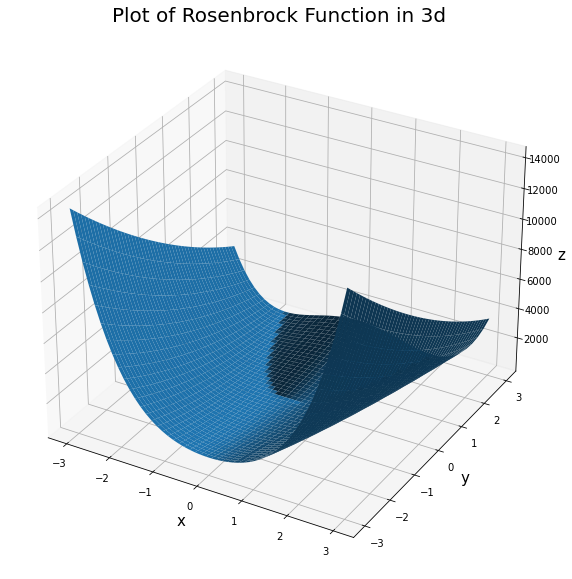

In [4]:
import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-3:3:50j,-3:3:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)
ax.set_title("Plot of Rosenbrock Function in 3d", fontsize = 20)
ax.set_xlabel("x", fontsize =15)
ax.set_ylabel("y", fontsize =15)
ax.set_zlabel("z", fontsize =15)

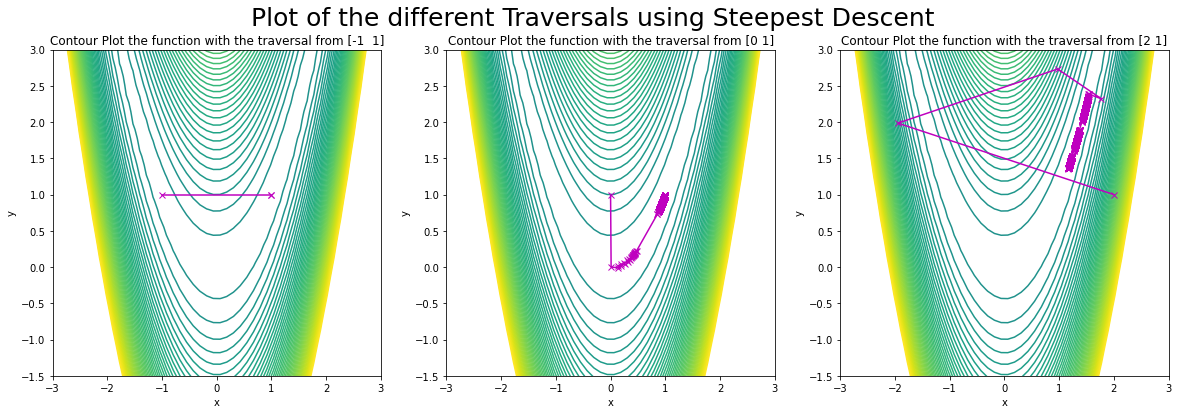

In [5]:
fig, axs = plt.subplots(1, 3, figsize = (20,6))
plt.suptitle("Plot of the different Traversals using Steepest Descent", fontsize = 25)
for i, ax in enumerate(axs):
    levels = np.linspace(-2000, 2000, 100)
    ax.contour(xmesh, ymesh, fmesh, levels = levels)
    start = np.array(start_list[i])
    ax.plot(start.T[0], start.T[1], "mx-")
    ax.set_title(f"Contour Plot the function with the traversal from {points[i]}")
    ax.set_xlim(-3,3)
    ax.set_ylim(-1.5,3)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

#### Problem 1b: Newton's Method

In [6]:
# Problem b using newton's method
def f(array):
    return 100*(array[1]-array[0]**2)**2 + (1-array[0])**2

def grad(array):
    partial_x = -400*array[0]*(-1*array[0]**2 +array[1]) + 2*array[0]-2
    partial_y = -200*array[0]**2 + 200*array[1]
    return np.array([partial_x,partial_y])

def hess(array):
    partial_xx = 1200*array[0]**2 - 400*array[1] + 2
    partial_xy = -400*array[0]
    partial_yy = 200
    partial_yx = -400*array[0]
    return np.array([[partial_xx,partial_xy],[partial_yx, partial_yy]])

start_pt1 = np.array([-1,1])
start_pt2 = np.array([0,1])
start_pt3 = np.array([2,1])

def Newton(grad,hess, x_start):
    max_iters = 2000
    step_size_tol = 10**-8
    sk = 1 # initial to start
    iteration = 0
    x_list = []
    x_list.append(x_start) # want to add the initial points
    
    while norm(sk) > step_size_tol and iteration < max_iters:
        gradient = grad(x_start)
        hessian = hess(x_start)
        sk = np.linalg.solve(hessian,(-1*gradient))
        x_next = x_start  + sk
        x_list.append(x_next)
        x_start = np.copy(x_next) # index to the next one
        iteration += 1
    return x_list, iteration

In [7]:
start1_newton, iteration1 = Newton(grad, hess,start_pt1)
start2_newton,iteration2 = Newton(grad,hess,start_pt2)
start3_newton, iteration3 = Newton(grad,hess,start_pt3)
iter_list =[iteration1, iteration2, iteration3]
start_list = [start1_newton, start2_newton, start3_newton]


In [8]:
points = [start_pt1, start_pt2, start_pt3]
for index, i in enumerate(iter_list):
    print(f"Here is the Amount of Iterations for the point {points[index]} using Newton's Method: {i}")

Here is the Amount of Iterations for the point [-1  1] using Newton's Method: 3
Here is the Amount of Iterations for the point [0 1] using Newton's Method: 6
Here is the Amount of Iterations for the point [2 1] using Newton's Method: 6


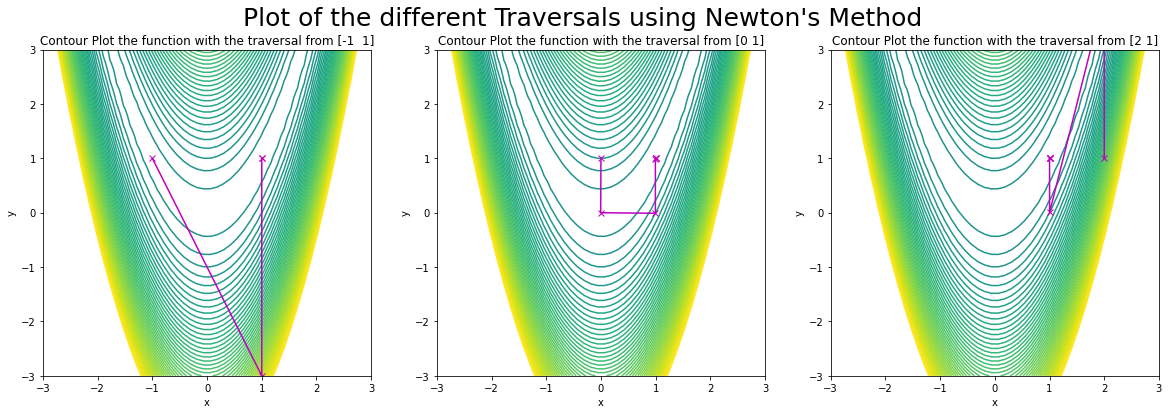

In [9]:
fig, axs = plt.subplots(1, 3, figsize = (20,6))
plt.suptitle("Plot of the different Traversals using Newton's Method", fontsize = 25)
for i, ax in enumerate(axs):
    levels = np.linspace(-2000, 2000, 100)
    ax.contour(xmesh, ymesh, fmesh, levels = levels)
    start = np.array(start_list[i])
    ax.plot(start.T[0], start.T[1], "mx-")
    ax.set_title(f"Contour Plot the function with the traversal from {points[i]}")
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

#### Problem 1c: BFGS

In [10]:
# Problem c using BFGS
import numpy as np
from numpy.linalg import norm
def f(array):
    return 100*(array[1]-array[0]**2)**2 + (1-array[0])**2

def grad(array):
    partial_x = -400*array[0]*(-1*array[0]**2 +array[1]) + 2*array[0]-2
    partial_y = -200*array[0]**2 + 200*array[1]
    return np.array([partial_x,partial_y])


start_pt1 = np.array([-1,1])
start_pt2 = np.array([0,1])
start_pt3 = np.array([2,1])

def BFGS(grad, x_start):
    Hk = np.identity(2)
    max_iters = 2000
    step_size_tol = 10**-8
    sk = 1 
    iteration = 0
    x_list = []
    x_list.append(x_start) # want to add the initial point

    while norm(sk) > step_size_tol and iteration < max_iters:
        gradient = grad(x_start)
        sk = np.dot(Hk,(-1*gradient))
       
        x_next = x_start  + sk
        # now update yk
        yk = grad(x_next) - gradient
        
        
        # matrix multiplications
        pk = 1/np.inner(yk.T,sk) # scalar, can also do a dot product
        sk2 = np.outer(sk,sk.T) # 2x2
        ykskT = np.outer(yk,sk.T) #can used to substitute later
        skykT = np.outer(sk, yk.T)
        I = np.identity(2) # need to use in delta_H equation
        
        # Trying to solve for Delta_H
        part1 = np.dot((I-pk*skykT),Hk)
        delta_H = np.dot(part1,(I-pk*ykskT)) + (pk*sk2)
       
        H_next = delta_H
        
        # update all values
        x_list.append(x_next)
        x_start = np.copy(x_next) # index to the next one
        Hk = np.copy(H_next)
        iteration += 1
    return x_list, iteration

In [11]:
start1_bfgs, iteration1 = BFGS(grad,start_pt1)
start2_bfgs,iteration2 = BFGS(grad,start_pt2)
start3_bfgs, iteration3 = BFGS(grad,start_pt3)
iter_list =[iteration1, iteration2, iteration3]


In [12]:
points = [start_pt1, start_pt2, start_pt3]
for index, i in enumerate(iter_list):
    print(f"Here is the Amount of Iterations for point {points[index]}: {i} using BFGS")

Here is the Amount of Iterations for point [-1  1]: 124 using BFGS
Here is the Amount of Iterations for point [0 1]: 38 using BFGS
Here is the Amount of Iterations for point [2 1]: 45 using BFGS


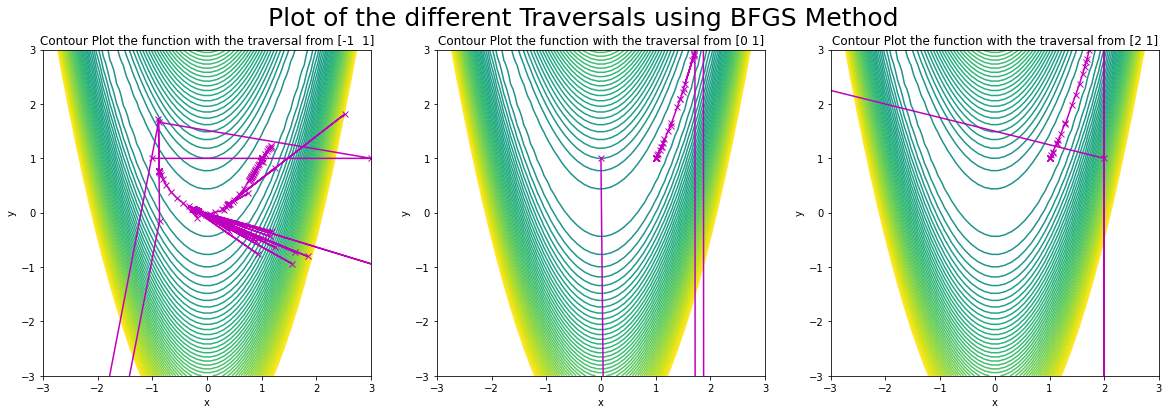

In [13]:
start_list = [start1_bfgs, start2_bfgs, start3_bfgs]
fig, axs = plt.subplots(1, 3, figsize = (20,6))
plt.suptitle("Plot of the different Traversals using BFGS Method", fontsize = 25)
for i, ax in enumerate(axs):
    levels = np.linspace(-2000, 2000, 100)
    ax.contour(xmesh, ymesh, fmesh, levels = levels)
    start = np.array(start_list[i])
    ax.plot(start.T[0], start.T[1], "mx-")
    ax.set_title(f"Contour Plot the function with the traversal from {points[i]}")
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

## Problem 2: Sharpe Determination 

#### Problem 2a: Integral Expressions

Given the function: $L(b, \lambda) = T + \lambda(I-R) $

Taking the partial with respect to $\lambda$ :
$$\frac{d L(b, \lambda)}{d \lambda}= (I-R) = \int_{0}^{L} \sqrt{1+(\frac{dy}{dx})^2}-R $$

Taking the partial with respect to b :
$$\frac{d L(b, \lambda)}{d b}= \frac{d T}{d b} + \lambda(\frac{dI}{d b} - \frac{dR}{d t}) $$

$$= pw^2\int_0^L [2 y \frac {sin(\pi x k)}{L} \sqrt{1+(y')^2} + y^2 \frac{y'}{\sqrt{1+(y')^2}} \frac{\pi}{L} k cos(\frac{\pi x k }{L})] + \lambda(\int_0^L \frac{y'}{\sqrt{1+(y')^2}} \frac{\pi}{L}k cos(\frac{\pi xk}{L}))dx $$

#### Problem 2b: Stationary Points

Rope shape:

$$y(x) =  \sum_{k=1}^{20} b_k sin \frac {\pi k x }{L}$$

Derivative of rope shape to x:

$$\frac{\delta y}{\delta x} = \frac{\pi}{L} \sum_{k=1}^{20} k b_k cos \frac {\pi k x }{L}$$

Can use the equations to solve for stationary points of L

In [14]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

R = 3 
w = 1
L = 1
p = 1

def y(b, x): # rope shape
    internal_sum_y = 0 
    for k, bi in enumerate(b):
        internal_sum_y = internal_sum_y +  bi * np.sin((np.pi*(k+1)*x)/L)
    return internal_sum_y
        
def dy_dx(b, x): # derivative of rope shape for x from eqn above
    internal_sum = 0 
    for k, bi in enumerate(b):
        internal_sum  = internal_sum + (k +1) * bi * np.cos((np.pi*(k+1)*x)/L)
    result = (np.pi / L)* internal_sum
    return result 


In [15]:
def lagrange_derivative_lambda(b):
    xs = np.linspace(0, L, 251)
    def f(x):
        return np.sqrt(1 + dy_dx(b,x)**2)
    return np.trapz( f(xs), xs) - R

def lagrange_derivative_b(b, k, lam):
    xs = np.linspace( 0, L, 251)
    
    # seperating the equation into T and lambda
    def part1(x):
        return 2*y(b, x)*(np.sin(np.pi*x*(k+0))/L)*np.sqrt(1+dy_dx(b, x)**2) + y(b, x)**2 * ((dy_dx(b, x)/ (np.sqrt(1+(dy_dx(b, x)**2)))))*(k+0)*(np.pi/L)*(np.cos((np.pi*x*(k+0))/L))
    integrate_part1 = np.trapz(part1(xs), xs)
    

    def part2(x):
        return ((dy_dx(b, x)/ (np.sqrt(1+(dy_dx(b, x)**2))))) * (np.pi/L) * (k+0) * (np.cos((np.pi *x *(k+0))/L))
    integrate_part2 = np.trapz(part2(xs), xs)
    
    return p*(w**2)*integrate_part1 + lam*integrate_part2
    
    
def grad_L(p):
    # the b vector has 20 elements
    # the p vector has 21 elements
    b  = p[:-1] #first 20
    lam = p[-1] # just last one
    g_results = []

    #storing each result
    for k, bi in enumerate(b):
        res = lagrange_derivative_b(b, k+1, lam)
        g_results.append(res)

    #need lambda at the end
    g_results.append(lagrange_derivative_lambda(b))

    return g_results
  
   


Need to check the finite differences: 

$\dfrac{\partial L}{\partial b_i} = \dfrac{L(b+he^i, \lambda) - L(b-he^i, \lambda)}{2h}$

$\dfrac{\partial L}{\partial \lambda} = \dfrac{L(b, \lambda +h) - L(b,\lambda -h)}{2h} + O(h^2)$

In [16]:
# initial guess given
p_0 = np.zeros((21,))
p_0[0] = 1.3 

solve_with_guess = fsolve(grad_L,p_0,xtol=10e-6) 


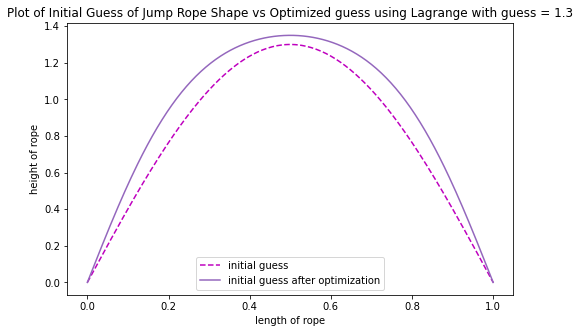

In [17]:
x_lins = np.linspace(0, L, 251)
y_guess = y(p_0[:-1], x_lins)
y_guess_optimized = y(solve_with_guess[:-1], x_lins)

# plotting
plt.figure(figsize = (8,5))
plt.title("Plot of Initial Guess of Jump Rope Shape vs Optimized guess using Lagrange with guess = 1.3")
plt.plot(x_lins, y_guess,'m--' ,label = "initial guess")
plt.plot(x_lins, y_guess_optimized,'tab:purple' ,label = "initial guess after optimization")
plt.xlabel("length of rope") # y(x) across x between (0,L)
plt.ylabel("height of rope") # y(x) across y between (0,R)
plt.legend()

#### Problem 2c: $b_2$ = 0.7

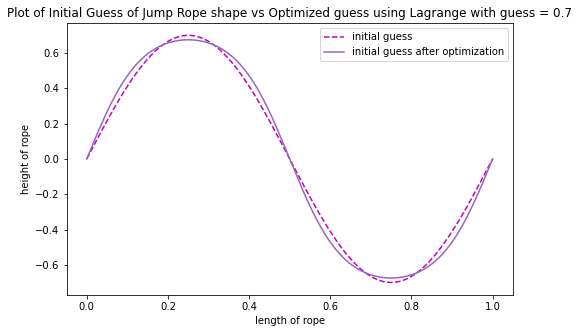

In [18]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

p_0 = np.zeros((21,))
p_0[1] = 0.7 #initial guess for b1

#initial guess
solve_with_guess = fsolve(grad_L,p_0 ) 


x_lins = np.linspace(0, L, 251)
y_guess = y(p_0[:-1], x_lins)
y_guess_optimized = y(solve_with_guess[:-1], x_lins)

plt.figure(figsize = (8,5))
plt.title("Plot of Initial Guess of Jump Rope shape vs Optimized guess using Lagrange with guess = 0.7")
plt.plot(x_lins, y_guess,'m--' ,label = "initial guess")
plt.plot(x_lins, y_guess_optimized, 'tab:purple',label = "initial guess after optimization")
plt.xlabel("length of rope") # y(x) across x
plt.ylabel("height of rope") # y(x) across y
plt.legend()

## Problem 3: Quantum Eigenmodes

#### Problem 3a: lowest eigenvalues/eigenmodes

In [19]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse.linalg as spl

def v1(x):
    return abs(x)

def v2(x):
    return 12*(x/10)**4 - (x**2/18)+(x/8) + (13/10)

def v3(x):
    return 7*abs(abs(abs(x)-1)-1)

def shrod(x):
    return (x**2)/10

n = 1921
interval = np.linspace(-12,12,n)

i = [1,2,3,4,5]

def phi(p,x, lam):
    return p(x)*np.exp(-lam*x**2)
    

In [20]:
def finite_difference(v,n,h):
    '''Sparse matrix filling the diagonals based off of the function'''
    sparse_matrix = np.zeros((n,n))
    
    for i in range(n):
        if i+1 < n:
            sparse_matrix[i, i+1] = -1/(h**2)
        if i-1 >= 0:
            sparse_matrix[i, i-1] = -1/(h**2)
    #for i in range(n):
        x = i*h - 12
        sparse_matrix[i,i] = v(x) + 2/(h**2)
    return sparse_matrix

n =1919 
h = 24/n 
sparse_shrod = finite_difference(shrod,n,h)
sparse_v1 = finite_difference(v1,n,h)
sparse_v2 = finite_difference(v2,n,h)
sparse_v3 = finite_difference(v3,n,h)

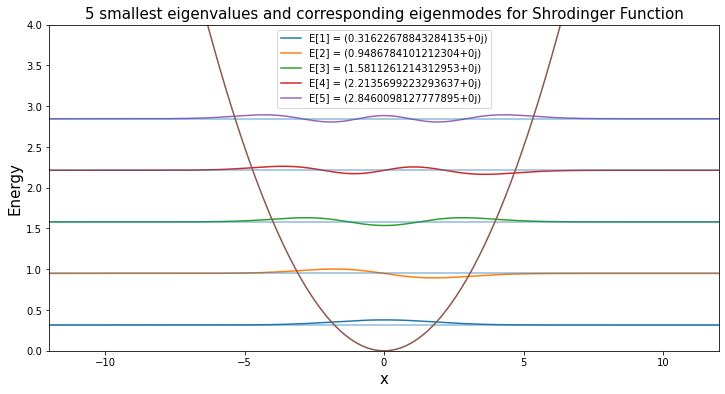

In [21]:
# use .eigs to get the 5 SMALLEST (SM) eigenvectors
vals0, vecs0 = spl.eigs(sparse_shrod, k=5, which='SM')

xs = np.linspace(-12, 12, n)
plt.figure(figsize=(12,6))
for i in range(5):
    plt.plot(xs, vecs0[:,i] + vals0[i], label = f"E[{i+1}] = {vals0[i]}")

#plots the eigenvalues as axlines
for i in vals0:
    plt.axhline(i, alpha = 0.5)

plt.title("5 smallest eigenvalues and corresponding eigenmodes for Shrodinger Function", size = 15)
plt.ylabel("Energy",fontsize=15)
plt.xlabel("x",fontsize=15)
plt.plot(xs, shrod(xs))
plt.xlim(-12,12)
plt.ylim(0, 4)
plt.legend(loc="best")


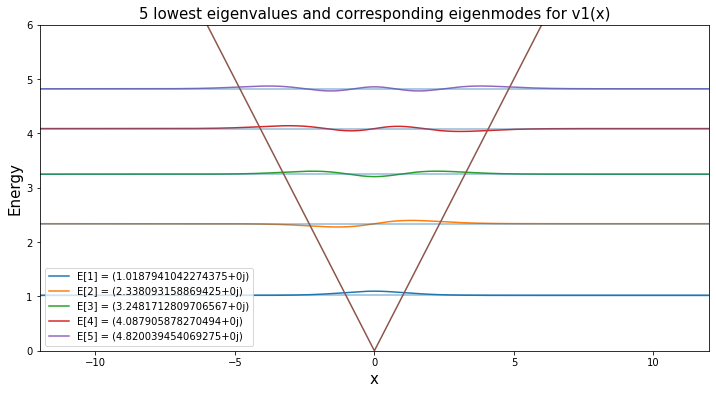

In [22]:
x_lin = np.linspace(-12, 12, n)
plt.figure(figsize=(12,6))


vals1, vecs1 = spl.eigs(sparse_v1, k=5, which='SM')
x_lin = np.linspace(-12, 12, n)
for i in range(5):
    plt.plot(x_lin, vecs1[:,i] + vals1[i],  label = f"E[{i+1}] = {vals1[i]}")

for i in vals1:
    plt.axhline(i, alpha = 0.5)

plt.title("5 lowest eigenvalues and corresponding eigenmodes for v1(x)", size =15)
plt.ylabel("Energy", fontsize =15)
plt.xlabel("x", fontsize = 15)
plt.plot(x_lin, v1(x_lin))
plt.ylim(0, 6)
plt.xlim(-12,12)
plt.legend(loc="best")
plt.show()

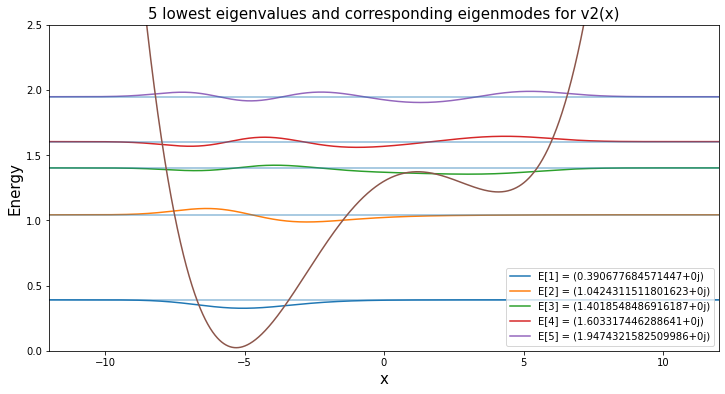

In [23]:
vals2, vecs2 = spl.eigs(sparse_v2, k=5, which='SM')
x_lin = np.linspace(-12, 12, n)
plt.figure(figsize=(12,6))

for i in range(5):
    plt.plot(x_lin, vecs2[:,i] + vals2[i],  label = f"E[{i+1}] = {vals2[i]}")

for i in vals2:
    plt.axhline(i, alpha = 0.5)

plt.title("5 lowest eigenvalues and corresponding eigenmodes for v2(x)", size = 15)
plt.ylabel("Energy", fontsize =15)
plt.xlabel("x", fontsize =15)
plt.plot(x_lin, v2(x_lin))
plt.ylim(0, 2.5)
plt.xlim(-12,12)
plt.legend(loc="best")
plt.show()


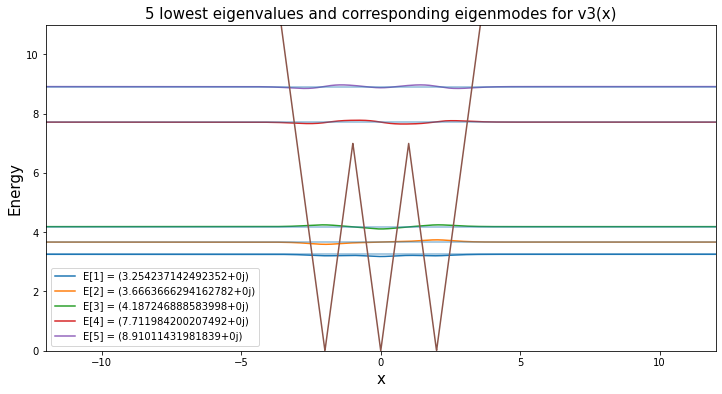

In [24]:

x_lin = np.linspace(-12, 12, n)
plt.figure(figsize=(12,6))

vals3, vecs3 = spl.eigs(sparse_v3, k=5, which='SM')
for i in range(5):
    #text = f"E1={vals[i]}"
    plt.plot(x_lin, vecs3[:,i] + vals3[i], label = f"E[{i+1}] = {vals3[i]}")

for i in vals3:
    plt.axhline(i, alpha = 0.5)

plt.title("5 lowest eigenvalues and corresponding eigenmodes for v3(x)", size = 15)
plt.ylabel("Energy", fontsize = 15)
plt.xlabel("x", fontsize =15)
plt.plot(x_lin, v3(x_lin))
plt.ylim(0, 11)
plt.xlim(-12,12)
plt.legend(loc="best")
plt.show()

#### Problem 3b: wave function

In [25]:
from scipy.integrate import simps
n =1919 
h = 24/n 

x_lins = np.linspace(-12, 12, n) # interval
# a is at the location 0, hence at this index:
a = int(12/h) #index of a
x_lins[a] #this is a

# b is at the location 6, hence at this index:
b = int(18/h) #index of b
x_lins[b] #this is b

# need to use the values from v2 equation
for i in range(5):
    x_val = (np.abs(vecs2[:,i]))**2
    phi_top = simps(x_val[a:b],x_lins[a:b] ) # integration
    phi_bot = simps(x_val,x_lins )
    p = phi_top/phi_bot
    print(f"Eigenmode value = {vals2[i]}, Probability to be in the region = {round(p,4)} ")

Eigenmode value = (0.390677684571447+0j), Probability to be in the region = 0.0003 
Eigenmode value = (1.0424311511801623+0j), Probability to be in the region = 0.0306 
Eigenmode value = (1.4018548486916187+0j), Probability to be in the region = 0.7874 
Eigenmode value = (1.603317446288641+0j), Probability to be in the region = 0.3998 
Eigenmode value = (1.9474321582509986+0j), Probability to be in the region = 0.5313 
